# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime, timedelta
from ipywidgets.embed import embed_minimal_html

# Import API key
from api_keys import api_key, gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

672

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_weather_data = []
query_url = base_url + "appid=" + api_key + "&units=metric&q="

i=0

for item in cities:
    
    try:
       
        response = requests.get(query_url + item).json()
        city = response['name']
        cloudiness = response['clouds']['all']
        if cloudiness > 100:
            cloudiness = ""
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        if humidity > 100: 
            humidity = ""
        lat=response['coord']['lat']
        lng=response['coord']['lon']
        max_temp=response['main']['temp_max']
        wind_speed=response['wind']['speed']
        
        print(f"Reading city number {i}: {item}")
            
        dict = {"City":city,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,
           "Max Temp":max_temp,"Wind Speed":wind_speed,"Cloudiness":cloudiness}

        city_weather_data.append(dict)
        
        i += 1
  
    except:
        
        print(f'error reading city: {item}')
     
    time.sleep(1)

Reading city number 0: sawankhalok
Reading city number 1: bambous virieux
Reading city number 2: hobart
Reading city number 3: busselton
error reading city: bengkulu
Reading city number 4: victoria
Reading city number 5: butaritari
Reading city number 6: praia
Reading city number 7: yumen
error reading city: lolua
Reading city number 8: ribeira grande
Reading city number 9: whitehorse
Reading city number 10: east london
Reading city number 11: semirom
Reading city number 12: mataura
Reading city number 13: pisco
Reading city number 14: yatou
Reading city number 15: mar del plata
Reading city number 16: guerrero negro
Reading city number 17: thompson
Reading city number 18: anadyr
Reading city number 19: hithadhoo
Reading city number 20: tiksi
Reading city number 21: lebu
Reading city number 22: bethel
Reading city number 23: albany
error reading city: bairiki
Reading city number 24: kodiak
Reading city number 25: biak
Reading city number 26: qaanaaq
Reading city number 27: punta arenas

error reading city: belushya guba
error reading city: umzimvubu
Reading city number 220: castro
Reading city number 221: irupi
Reading city number 222: wanning
Reading city number 223: petropavlovsk-kamchatskiy
Reading city number 224: west plains
Reading city number 225: beyneu
Reading city number 226: kumba
Reading city number 227: salinas
Reading city number 228: diego de almagro
Reading city number 229: khandyga
error reading city: sentyabrskiy
Reading city number 230: kologriv
error reading city: tapaua
Reading city number 231: srandakan
Reading city number 232: berlevag
Reading city number 233: nuuk
Reading city number 234: zaraza
Reading city number 235: arona
Reading city number 236: keetmanshoop
Reading city number 237: bandarbeyla
Reading city number 238: karratha
Reading city number 239: mandalgovi
Reading city number 240: smidovich
Reading city number 241: klyuchi
Reading city number 242: coihaique
Reading city number 243: caravelas
Reading city number 244: eureka
Reading c

Reading city number 425: baoqing
Reading city number 426: tibati
Reading city number 427: byron bay
Reading city number 428: faya
Reading city number 429: cockburn town
Reading city number 430: saldanha
Reading city number 431: pemba
Reading city number 432: bathsheba
Reading city number 433: tacna
Reading city number 434: isangel
Reading city number 435: friesach
error reading city: cozumel
Reading city number 436: rocha
Reading city number 437: bilibino
Reading city number 438: cuamba
Reading city number 439: jizan
Reading city number 440: jackson
Reading city number 441: lazaro cardenas
Reading city number 442: lethem
Reading city number 443: kpalime
Reading city number 444: chapais
Reading city number 445: samarai
Reading city number 446: makakilo city
Reading city number 447: eyl
Reading city number 448: paidha
Reading city number 449: mashhad
Reading city number 450: puerto baquerizo moreno
Reading city number 451: westport
Reading city number 452: buala
Reading city number 453: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather_data_df = pd.DataFrame(city_weather_data)
city_weather_data_df['Date'] = pd.to_datetime(city_weather_data_df['Date'],unit='s')
city_weather_data_df['Date'] = city_weather_data_df['Date'].dt.date
city_weather_data_df


,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Cloudiness
0,Sawankhalok,TH,2019-11-13,90,17.31,99.83,24.03,1.66,22
1,Bambous Virieux,MU,2019-11-13,83,-20.34,57.76,25.56,3.60,75
2,Hobart,AU,2019-11-13,70,-42.88,147.33,10.56,0.89,31
3,Busselton,AU,2019-11-13,34,-33.64,115.35,19.44,4.15,0
4,Victoria,BN,2019-11-13,74,5.28,115.24,28.00,2.10,75
...,...,...,...,...,...,...,...,...,...
595,Baragua,CU,2019-11-13,77,21.70,-78.63,26.92,4.15,33
596,Ures,MX,2019-11-13,59,30.73,-112.95,16.11,0.89,0
597,Saint-Jean-de-Maurienne,FR,2019-11-13,61,45.28,6.35,9.00,3.10,51
598,Tromso,NO,2019-11-13,82,69.65,18.96,0.00,10.30,100


In [5]:
city_weather_data_df.to_csv("weatherdata.csv")
city_weather_data_df.to_html("weatherdata.html")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
date2 = datetime.fromtimestamp(date).strftime('%m/%d/%Y')


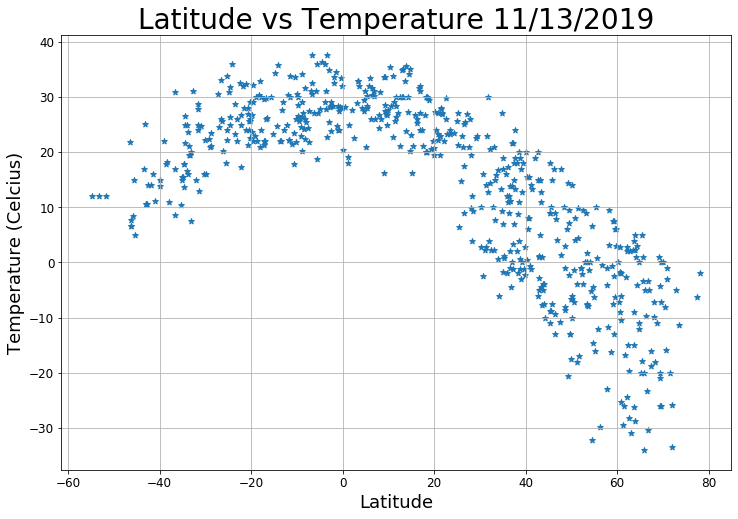

In [47]:

plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Max Temp'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Temperature", date2), fontsize =28)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Temperature (Celcius)", fontsize =18)
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

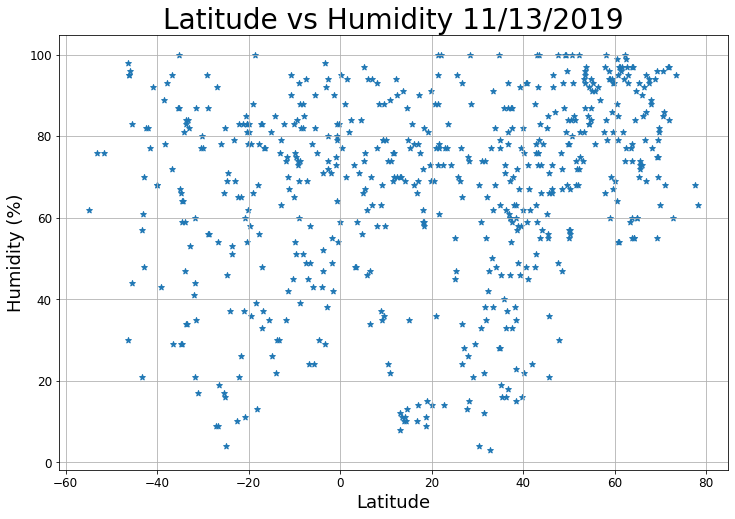

In [48]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Humidity'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Humidity", date2), fontsize =28)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Humidity (%)", fontsize =18)
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

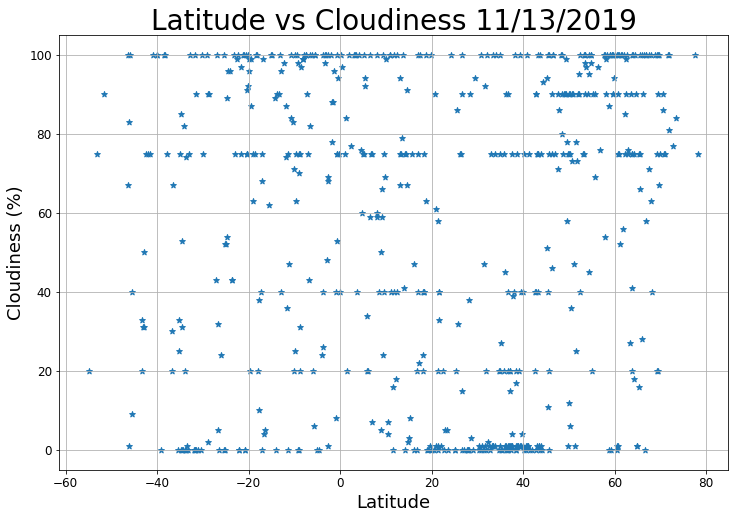

In [49]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Cloudiness'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Cloudiness", date2), fontsize =28)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Cloudiness (%)", fontsize =18)
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

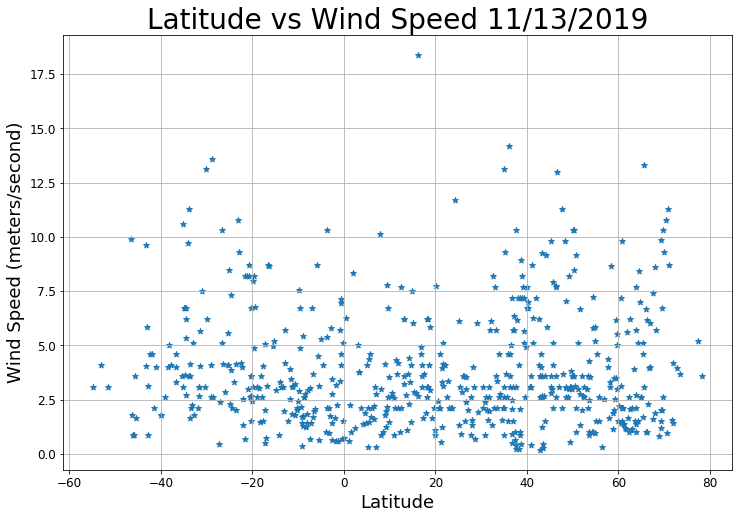

In [50]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Wind Speed'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Wind Speed", date2), fontsize =28)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Wind Speed (meters/second)", fontsize =18)
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("WindSpeed.png")
plt.show()

Observations:

1: Some of the openweather entries contain % Humidity that is above 100%, which is not possible and which skews the visualization of the data.   As such, I exclude any values over 100% on Humidity or Cloudiness.

2: The scatterplot for temperature vs latitude reflect the expected result of high values at the equator and low values at the polls.  This was just as pronounced when a small number of datapoints was plotted as it was when 500+ points were plotted.

3: The scatterplot for humidity vs. latitude reflects a less pronounced trend, but closer to the equator, humidity is more consistently high, in comparison to spots more distant from the equator.  In earlier runs of the data with less than 500 points, this was unpronounced and no such observation was possible, but becomes clearer with a large number of datapoints.   There does not appear to be a correlation between latitude and either cloudiness or wind speed.




In [52]:
#from api_keys import gkey
import webbrowser
import gmaps
from random import randint

gmaps.configure(api_key=gkey)

coordinate_list = []
city_list = []
x=0
for rows in city_weather_data_df.iterrows():
    latitude=city_weather_data_df.iloc[x,4]
    longitude=city_weather_data_df.iloc[x,5]
    tuplecoord=(latitude,longitude)
    city = city_weather_data_df.iloc[x,0]
    country = city_weather_data_df.iloc[x,1]
    temp = city_weather_data_df.iloc[x,6]
    celsius= int(temp)
    fahrenheit= int((temp*9/5) + 32)
    cityname = f'{city}, {country}: {celsius}&#176;C/{fahrenheit}&deg;F'
    coordinate_list.append(tuplecoord)
    city_list.append(cityname)
    x+=1
    
bins = pd.cut(city_weather_data_df['Max Temp'],6, labels = [(148,0,211),(0,0,255),(0,128,0),(255,215,0),(255,128,0),(255,0,0)])
colors = bins.tolist()            
unlabeled_bins = pd.cut(city_weather_data_df['Max Temp'],6)

unlabeled_bins


0        (13.767, 25.708]
1        (13.767, 25.708]
2         (1.825, 13.767]
3        (13.767, 25.708]
4         (25.708, 37.65]
              ...        
595       (25.708, 37.65]
596      (13.767, 25.708]
597       (1.825, 13.767]
598      (-10.117, 1.825]
599    (-22.058, -10.117]
Name: Max Temp, Length: 600, dtype: category
Categories (6, interval[float64]): [(-34.072, -22.058] < (-22.058, -10.117] < (-10.117, 1.825] < (1.825, 13.767] < (13.767, 25.708] < (25.708, 37.65]]

In [12]:
coordinates = randint(0,len(coordinate_list))
figa = gmaps.figure(center=coordinate_list[coordinates], zoom_level=10, map_type = "HYBRID", display_toolbar = True)
#marker_layera = gmaps.symbol_layer(coordinate_list[coordinates], info_box_content=city_list[coordinates])
#figa.add_layer(marker_layera)

figa

Figure(layout=FigureLayout(height='420px'))

In [13]:
figb = gmaps.figure(center=(0,0), zoom_level=2)
symbol_layerb = gmaps.symbol_layer(coordinate_list, info_box_content=city_list, fill_color = colors, stroke_color=colors, scale=3)
figb.add_layer(symbol_layerb)
embed_minimal_html('export.html', views=[figb])
figb

Figure(layout=FigureLayout(height='420px'))